Mean Squared Error: 0.87972790507397
R^2 Score: 0.3242738266579843


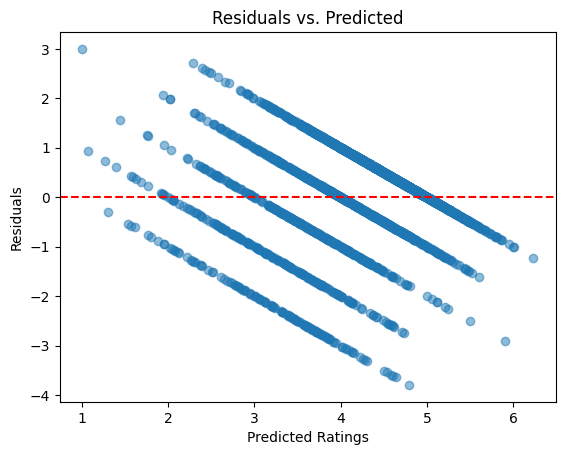

In [ ]:
import json
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Define a function to preprocess and extract features from a chunk of data
def process_chunk(chunk):
    # Convert to DataFrame
    df = pd.DataFrame(chunk)

    # Data Preprocessing
    df['reviewText'] = df['reviewText'].fillna('')  # Fill missing values
    df['processedText'] = df['reviewText'].str.lower()  # Convert text to lower case
    
    return df

# Path to your JSON file
file_path = '/Users/aqibullah/Downloads/15000.json'
chunk_size = 100  # Adjust this depending on your memory capacity

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)  # Adjust max_features as needed

# Process data in chunks and append the processed data
processed_data = pd.DataFrame()
chunks = pd.read_json(file_path, lines=True, chunksize=chunk_size)

for chunk in chunks:
    processed_chunk = process_chunk(chunk)
    processed_data = pd.concat([processed_data, processed_chunk])

# Apply TF-IDF transformation to the entire processed dataset
X = vectorizer.fit_transform(processed_data['processedText'])
y = processed_data['overall']

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training with Linear Regression
model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Plotting the residuals
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residuals vs. Predicted')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()